# Dataset

In [1]:
import pandas as pd

dataset_df = pd.read_csv('data/csv/All.csv', encoding='utf-8', dtype=str, low_memory=False)

In [2]:
dataset_df

,PTTp,PTTf,PTTd,HeartRate,SBP,DBP,AI,LASI,S1,S2,...,pulse_amp_var,rise_time,decay_time,half_width,aug_index,stiffness_index,pulse_pressure,map_pressure,dp_dt_max,respiratory_rate
0,0.0883809523809524,0.44000000000000006,2.6733333333333333,125.12695097297141,130.43329604900043,64.68913169835835,0.9922470519252067,2.392,11.784402737047898,4.340562267839687,...,0.3820114505797497,0.1287619047619048,0.33790476190476193,0.0,0.9593148407824608,2.648068281263416,65.74416435064208,86.60385314857238,19.977238647409067,14.880952380952381
1,0.07000000000000002,0.41515789473684217,1.672,123.96177910670554,157.72738151641408,64.38629825186952,0.9177047289504034,3.84,6.033327859237537,7.44174467253177,...,0.4715486201813602,0.12145454545454548,0.31745454545454554,0.0,0.9464160186451942,2.63677820688337,93.34108326454457,95.49999267338437,27.401542496812922,20.32520325203252
2,0.07847619047619048,0.44320000000000004,0.504,121.96242854624663,140.10442869493437,50.98347603952466,0.989021633839199,1.48,3.8016195503421315,2.742877028347996,...,0.3751655072208014,0.12723809523809526,0.3470476190476191,0.0,0.956182819838677,2.7224977994152177,89.12095265540971,80.69046025799456,18.1700067893305,25.08361204013378
3,0.05676190476190477,0.3928000000000001,3.544,129.59047971954195,138.06274513634833,55.58459066198415,0.9848300582474556,0.48,13.149560899315741,0.9034979472140763,...,0.4484266031694176,0.11454545454545456,0.326909090909091,0.0,0.9601489023466073,2.5973763587666445,82.47815447436417,83.07730882010554,17.58387753806177,18.89168765743073
4,0.0712,0.4374736842105264,3.2440000000000007,121.84646571478936,132.6019742786947,55.93626821274539,0.9975117862755369,1.488,6.727907722385142,2.710827761485826,...,0.40173185954287516,0.13120000000000004,0.34920000000000007,0.0,0.9658198725998229,2.5926581068638916,76.66570606594932,81.49150356806183,18.23838853531184,20.51048313582498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4940,0.5011428571428571,0.3822857142857144,2.518857142857143,90.13468008419939,168.8285046099021,97.14496720610043,0.9449321628092577,4.008,8.27980136852395,7.3020715542522,...,0.5425351661954748,0.1297777777777778,0.388,0.0,0.9623391373637852,2.482506402556901,71.68353740380167,121.03947967403433,32.17846446008757,15.44799176107106
4941,0.3381333333333334,0.2661333333333333,4.872571428571429,90.51399808433051,138.18569728798263,78.64674610664025,0.894874694922317,0.504,16.8972715542522,1.0228183773216033,...,0.6338424419097897,0.09907692307692309,0.2704615384615385,0.0,0.9695133857757708,2.6188957003473132,59.538951181342384,98.49306316708771,27.00880951404072,20.566727605118828
4942,0.5068571428571428,0.41599999999999987,1.0426666666666666,90.51821592016374,178.1948408953702,78.07234000152394,0.9983107051241943,2.824,6.2422357771260994,4.815519843597263,...,0.5137151913060827,0.13788235294117648,0.43717647058823533,0.0,0.9758012365978473,2.6915497742163392,100.12250089384625,111.44650696613937,25.918610171677088,21.097046413502106
4943,0.29947826086956525,0.20973913043478265,3.3327999999999998,155.74575797668763,113.00553565632205,56.17062845987654,0.997623177233892,7.712,3.030912218963832,15.89653567937439,...,0.823210561396508,0.1645217391304348,0.24034782608695654,0.0,0.9791590650230757,2.5604117314190282,56.83490719644551,75.11559752535838,17.974601107160495,20.642201834862387


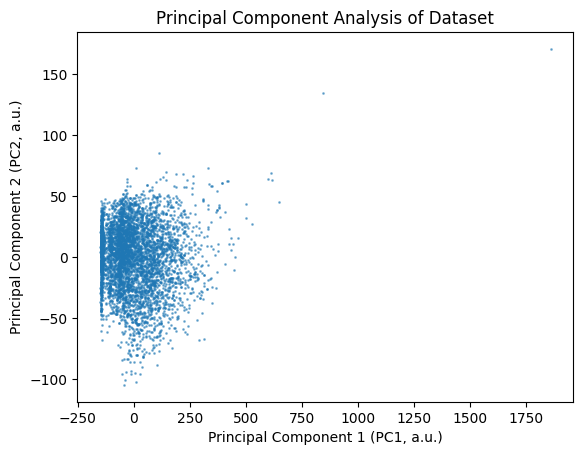

In [3]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA as PCA_sklearn

dataset_initial_PCA = PCA_sklearn(n_components=2)
PC1, PC2 = dataset_initial_PCA.fit_transform(dataset_df).T

plt.scatter(PC1, PC2, s=1, alpha=0.5)
plt.xlabel('Principal Component 1 (PC1, a.u.)')
plt.ylabel('Principal Component 2 (PC2, a.u.)')
plt.title('Principal Component Analysis of Dataset')
plt.savefig('figures/PCA_initial.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

In [4]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler

dbp = dataset_df[['DBP']].astype(np.float32)
sbp = dataset_df[['SBP']].astype(np.float32)
X = dataset_df.drop(columns=['DBP', 'SBP', 'pulse_pressure', 'map_pressure', 'dp_dt_max']).astype(np.float32)

X_scaler = StandardScaler()
X_scaled = X_scaler.fit_transform(X)

sbp_scaler = StandardScaler()
sbp_scaled = pd.DataFrame(sbp_scaler.fit_transform(sbp))

dbp_scaler = StandardScaler()
dbp_scaled = pd.DataFrame(dbp_scaler.fit_transform(dbp))

dbp = dbp['DBP']
sbp = sbp['SBP']

K_FOLDS = 5
kf = KFold(n_splits=K_FOLDS, shuffle=True, random_state=42)

In [5]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

def evaluate_regression(y_true, y_pred, label="Model", plot=True):
    r2 = r2_score(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)

    results_df = pd.DataFrame({
        'Model': [label],
        'R^2': [r2],
        'MSE': [mse],
        'RMSE': [rmse],
        'MAE': [mae]
    })
    print(results_df)

    if plot:
        plt.figure(figsize=(5, 5))
        plt.scatter(y_true, y_pred, alpha=0.5, label=label)
        min_val = min(y_true.min(), y_pred.min())
        max_val = max(y_true.max(), y_pred.max())
        plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--')
        plt.xlabel("True Values")
        plt.ylabel("Predicted Values")
        plt.title(f"{label} for Calibration Curve")
        plt.legend()
        plt.show()

        errors = y_true - y_pred
        plt.figure(figsize=(6, 5))
        plt.hist(errors, bins=min(round(max(errors) - min(errors)), 40), edgecolor='black', alpha=0.7)
        plt.xlabel("Error (True - Predicted)")
        plt.ylabel("Frequency")
        plt.title(f"Error Distribution for {label}")
        plt.show()
    return r2, mse, rmse, mae

# Evaluation against Measurement Standards

In [6]:
import numpy as np

def evaluate_bhs(differences_mmHg):
    differences_mmHg = np.abs(differences_mmHg)
    n = len(differences_mmHg)
    pct_5 = np.sum(differences_mmHg <= 5) / n * 100
    pct_10 = np.sum(differences_mmHg <= 10) / n * 100
    pct_15 = np.sum(differences_mmHg <= 15) / n * 100

    # Assign grade
    if pct_5 >= 60 and pct_10 >= 85 and pct_15 >= 95:
        grade = 'A'
    elif pct_5 >= 50 and pct_10 >= 75 and pct_15 >= 90:
        grade = 'B'
    elif pct_5 >= 40 and pct_10 >= 65 and pct_15 >= 85:
        grade = 'C'
    else:
        grade = 'D'

    return {
        'grade': grade,
        'percent_within_5mmHg': pct_5,
        'percent_within_10mmHg': pct_10,
        'percent_within_15mmHg': pct_15
    }

def evaluate_aami(differences_mmHg):
    differences_mmHg = np.array(differences_mmHg)
    mean_error = np.mean(differences_mmHg)
    std_dev = np.std(differences_mmHg, ddof=1)  # Sample std dev

    pass_fail = 'Pass' if abs(mean_error) <= 5 and std_dev <= 8 else 'Fail'

    return {
        'pass_fail': pass_fail,
        'mean_error_mmHg': mean_error,
        'std_dev_mmHg': std_dev
    }


# K-Fold Cross Validation Setup
All models below are evaluated using k-fold cross validation (k=5).

In [7]:
def train_and_evaluate_model(model_cls, X_train, X_test, y_train, y_test, model_kwargs=None, scale_y=False, y_scaler=None):
    model = model_cls(**(model_kwargs or {}))
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    if scale_y and y_scaler is not None:
        # Inverse transform predictions for reporting
        y_pred = y_scaler.inverse_transform(y_pred.reshape(-1, 1)).flatten()
        y_test = y_scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()
    return y_test, y_pred

def print_cross_val_results(label, metrics, bhs_results, aami_results):
    metrics = np.array(metrics)
    print(f"\n{label} Mean ± Std over {K_FOLDS} folds:")
    print(f"R^2: {metrics[:,0].mean():.4f} ± {metrics[:,0].std():.4f}")
    print(f"MSE: {metrics[:,1].mean():.4f} ± {metrics[:,1].std():.4f}")
    print(f"RMSE: {metrics[:,2].mean():.4f} ± {metrics[:,2].std():.4f}")
    print(f"MAE: {metrics[:,3].mean():.4f} ± {metrics[:,3].std():.4f}")
    
    # Aggregate BHS results
    avg_bhs = {
        'grade': max(set([res['grade'] for res in bhs_results]), key=[res['grade'] for res in bhs_results].count),
        'percent_within_5mmHg': np.mean([res['percent_within_5mmHg'] for res in bhs_results]),
        'percent_within_10mmHg': np.mean([res['percent_within_10mmHg'] for res in bhs_results]),
        'percent_within_15mmHg': np.mean([res['percent_within_15mmHg'] for res in bhs_results])
    }
    print(f"\n{label} BHS Evaluation (Mean over {K_FOLDS} folds):")
    print(f"Grade: {avg_bhs['grade']}")
    print(f"Percent within 5 mmHg: {avg_bhs['percent_within_5mmHg']:.3e}%")
    print(f"Percent within 10 mmHg: {avg_bhs['percent_within_10mmHg']:.3e}%")
    print(f"Percent within 15 mmHg: {avg_bhs['percent_within_15mmHg']:.3e}%")
    
    # Aggregate AAMI results
    avg_aami = {
        'mean_error_mmHg': np.mean([res['mean_error_mmHg'] for res in aami_results]),
        'std_dev_mmHg': np.mean([res['std_dev_mmHg'] for res in aami_results]),
        'pass_fail': 'Pass' if all(res['pass_fail'] == 'Pass' for res in aami_results) else 'Fail'
    }
    print(f"\n{label} AAMI Evaluation (Mean over {K_FOLDS} folds):")
    print(f"Mean Error (mmHg): {avg_aami['mean_error_mmHg']:.3e}")
    print(f"Standard Deviation (mmHg): {avg_aami['std_dev_mmHg']:.2f}")
    print(f"Pass/Fail: {avg_aami['pass_fail']}")

def cross_val_regression(model_cls, X, y, label, model_kwargs=None, scale_X=False, scale_y=False, y_scaler=None, plot=True):
    metrics = []
    bhs_results = []
    aami_results = []
    for fold, (train_idx, test_idx) in enumerate(kf.split(X)):
        if scale_X:
            X_scaler = StandardScaler()
            X_train = X_scaler.fit_transform(X[train_idx])
            X_test = X_scaler.transform(X[test_idx])
        else:
            X_train = X[train_idx]
            X_test = X[test_idx]
        if scale_y and y_scaler is not None:
            y_train = y_scaler.fit_transform(y[train_idx].reshape(-1, 1)).flatten()
            y_test = y_scaler.transform(y[test_idx].reshape(-1, 1)).flatten()
        else:
            y_train = y[train_idx]
            y_test = y[test_idx]
        
        y_test, y_pred = train_and_evaluate_model(
            model_cls, X_train, X_test, y_train, y_test, model_kwargs, scale_y, y_scaler
        )
        
        # Only plot for the first fold
        r2, mse, rmse, mae = evaluate_regression(y_test, y_pred, label=f"{label} (Fold {fold+1})", plot=(plot and fold==0))
        metrics.append([r2, mse, rmse, mae])
        
        # Evaluate against standards
        differences = y_test - y_pred
        bhs_results.append(evaluate_bhs(differences))
        aami_results.append(evaluate_aami(differences))
    
    print_cross_val_results(label, metrics, bhs_results, aami_results)

# Testing Various Models

In [8]:
MODELS_TO_TEST = {
    "LinearRegression": False,
    "RandomForestRegressor": True,
    "XGBRegressor": False,
    "SupportVectorRegressor": True,
    "CatBoostRegressor": True,
    "MultilayerPerceptronRegressor": True,
    "MultilayerPerceptronScaledRegressor": False,
}

## Linear Regression

In [9]:
from sklearn.linear_model import LinearRegression

if MODELS_TO_TEST["LinearRegression"]:
    # DBP
    cross_val_regression(LinearRegression, X.values, dbp.values, label="Linear Regression DBP", plot=True)

In [10]:
if MODELS_TO_TEST["LinearRegression"]:
    # SBP
    cross_val_regression(LinearRegression, X.values, sbp.values, label="Linear Regression SBP", plot=True)

## Random Forest Regressor

                        Model       R^2        MSE      RMSE       MAE
0  Random Forest DBP (Fold 1)  0.035783  49.810964  7.057688  5.467575


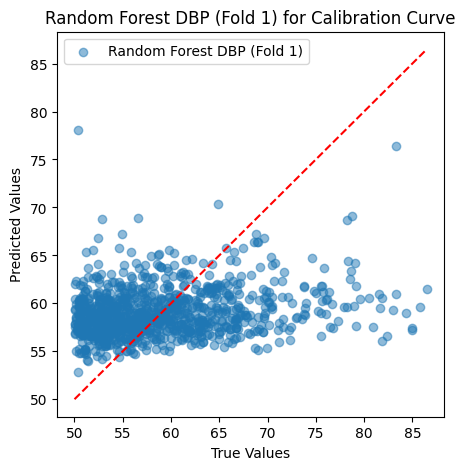

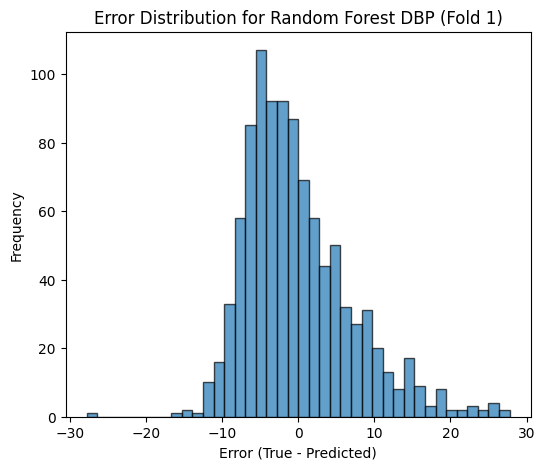

                        Model       R^2        MSE      RMSE       MAE
0  Random Forest DBP (Fold 2)  0.102183  51.509225  7.176993  5.610728
                        Model       R^2        MSE      RMSE       MAE
0  Random Forest DBP (Fold 3)  0.046467  50.015776  7.072183  5.600793
                        Model       R^2        MSE      RMSE       MAE
0  Random Forest DBP (Fold 4)  0.092914  52.542562  7.248625  5.492751
                        Model      R^2        MSE     RMSE       MAE
0  Random Forest DBP (Fold 5)  0.07816  50.312771  7.09315  5.627235

Random Forest DBP Mean ± Std over 5 folds:
R^2: 0.0711 ± 0.0259
MSE: 50.8383 ± 1.0356
RMSE: 7.1297 ± 0.0724
MAE: 5.5598 ± 0.0661

Random Forest DBP BHS Evaluation (Mean over 5 folds):
Grade: B
Percent within 5 mmHg: 5.193e+01%
Percent within 10 mmHg: 8.807e+01%
Percent within 15 mmHg: 9.569e+01%

Random Forest DBP AAMI Evaluation (Mean over 5 folds):
Mean Error (mmHg): -3.219e-01
Standard Deviation (mmHg): 7.12
Pass/Fail: Pass


In [11]:
from sklearn.ensemble import RandomForestRegressor

if MODELS_TO_TEST["RandomForestRegressor"]:
    # DBP
    cross_val_regression(RandomForestRegressor, X.values, dbp.values, label="Random Forest DBP", model_kwargs={'n_estimators':100, 'random_state':42})

                        Model      R^2         MSE       RMSE        MAE
0  Random Forest SBP (Fold 1)  0.21889  283.590466  16.840144  13.212981


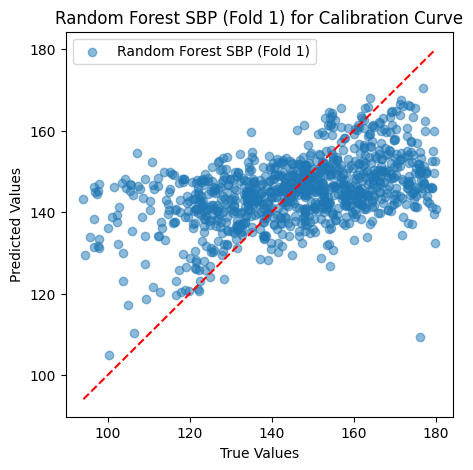

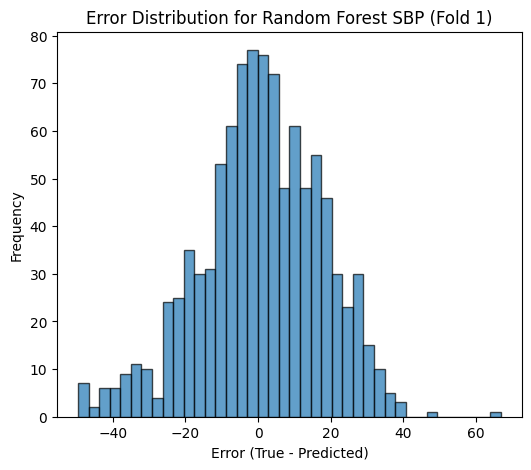

                        Model       R^2         MSE       RMSE        MAE
0  Random Forest SBP (Fold 2)  0.229157  275.168785  16.588212  13.150335
                        Model       R^2         MSE      RMSE        MAE
0  Random Forest SBP (Fold 3)  0.265482  278.550758  16.68984  13.143949
                        Model       R^2         MSE       RMSE        MAE
0  Random Forest SBP (Fold 4)  0.236985  274.071783  16.555113  13.105859
                        Model       R^2         MSE       RMSE        MAE
0  Random Forest SBP (Fold 5)  0.210083  287.759429  16.963473  13.287353

Random Forest SBP Mean ± Std over 5 folds:
R^2: 0.2321 ± 0.0190
MSE: 279.8282 ± 5.1679
RMSE: 16.7274 ± 0.1542
MAE: 13.1801 ± 0.0637

Random Forest SBP BHS Evaluation (Mean over 5 folds):
Grade: D
Percent within 5 mmHg: 2.580e+01%
Percent within 10 mmHg: 4.698e+01%
Percent within 15 mmHg: 6.313e+01%

Random Forest SBP AAMI Evaluation (Mean over 5 folds):
Mean Error (mmHg): 1.729e-01
Standard Deviation (mmHg

In [12]:
if MODELS_TO_TEST["RandomForestRegressor"]:
    # SBP
    cross_val_regression(RandomForestRegressor, X.values, sbp.values, label="Random Forest SBP", model_kwargs={'n_estimators':100, 'random_state':42})

## XGBoost Regressor

In [13]:
from xgboost import XGBRegressor

if MODELS_TO_TEST["XGBRegressor"]:
    # DBP
    cross_val_regression(XGBRegressor, X.values, dbp.values, label="XGBoost DBP", model_kwargs={'random_state':42})

In [14]:
if MODELS_TO_TEST["XGBRegressor"]:
    # SBP
    cross_val_regression(XGBRegressor, X.values, sbp.values, label="XGBoost SBP", model_kwargs={'random_state':42})

## Support Vector Machine

              Model       R^2        MSE      RMSE       MAE
0  SVM DBP (Fold 1) -0.073151  55.438422  7.445698  5.478629


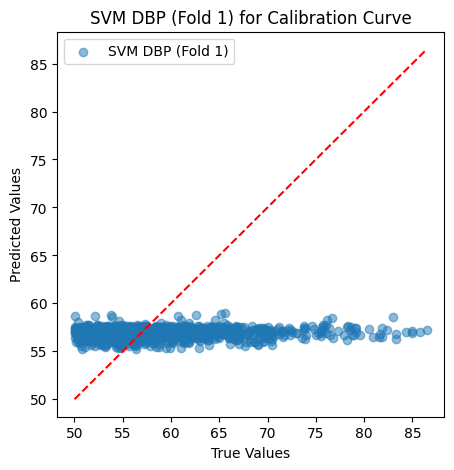

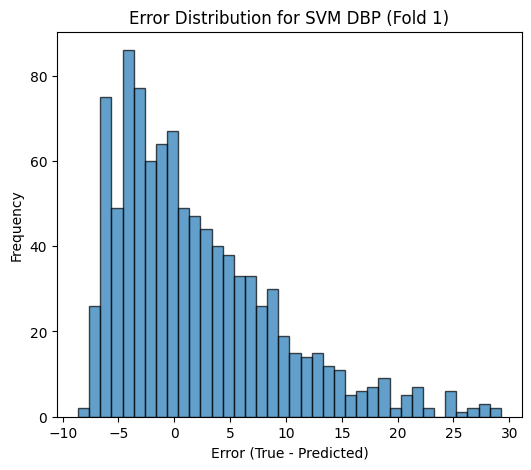

              Model       R^2        MSE      RMSE       MAE
0  SVM DBP (Fold 2) -0.076375  61.753379  7.858332  5.810987
              Model       R^2       MSE      RMSE       MAE
0  SVM DBP (Fold 3) -0.040675  54.58667  7.388279  5.454491
              Model       R^2        MSE      RMSE       MAE
0  SVM DBP (Fold 4) -0.043651  60.452979  7.775151  5.551361
              Model       R^2        MSE      RMSE       MAE
0  SVM DBP (Fold 5) -0.043985  56.979276  7.548462  5.569438

SVM DBP Mean ± Std over 5 folds:
R^2: -0.0556 ± 0.0157
MSE: 57.8421 ± 2.8012
RMSE: 7.6032 ± 0.1837
MAE: 5.5730 ± 0.1265

SVM DBP BHS Evaluation (Mean over 5 folds):
Grade: B
Percent within 5 mmHg: 5.678e+01%
Percent within 10 mmHg: 8.663e+01%
Percent within 15 mmHg: 9.347e+01%

SVM DBP AAMI Evaluation (Mean over 5 folds):
Mean Error (mmHg): 1.789e+00
Standard Deviation (mmHg): 7.39
Pass/Fail: Pass


In [15]:
from sklearn.svm import SVR

if MODELS_TO_TEST["SupportVectorRegressor"]:
    # DBP
    cross_val_regression(SVR, X.values, dbp.values, label="SVM DBP", model_kwargs={'kernel':'rbf'})

              Model      R^2         MSE       RMSE        MAE
0  SVM SBP (Fold 1) -0.00447  364.683723  19.096694  15.526844


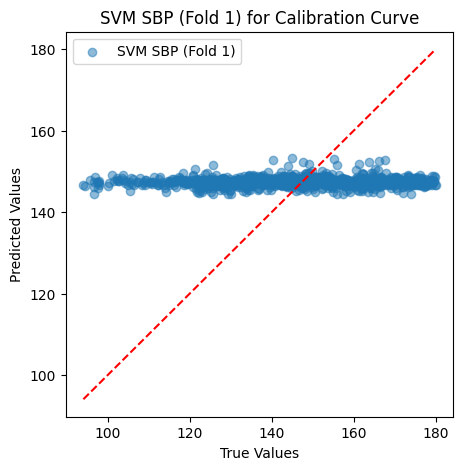

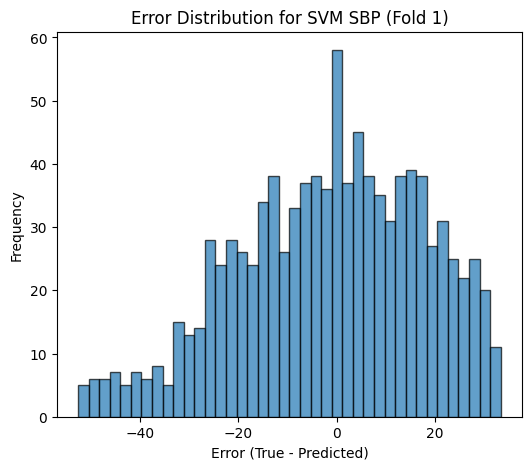

              Model       R^2         MSE       RMSE       MAE
0  SVM SBP (Fold 2)  0.004457  355.380015  18.851526  15.40529
              Model       R^2         MSE       RMSE       MAE
0  SVM SBP (Fold 3) -0.019638  386.676299  19.664087  15.72367
              Model       R^2         MSE      RMSE       MAE
0  SVM SBP (Fold 4) -0.015113  364.624365  19.09514  15.42178
              Model      R^2         MSE       RMSE        MAE
0  SVM SBP (Fold 5) -0.02107  371.966258  19.286427  15.591135

SVM SBP Mean ± Std over 5 folds:
R^2: -0.0112 ± 0.0097
MSE: 368.6661 ± 10.4305
RMSE: 19.1988 ± 0.2705
MAE: 15.5337 ± 0.1170

SVM SBP BHS Evaluation (Mean over 5 folds):
Grade: D
Percent within 5 mmHg: 2.034e+01%
Percent within 10 mmHg: 3.771e+01%
Percent within 15 mmHg: 5.321e+01%

SVM SBP AAMI Evaluation (Mean over 5 folds):
Mean Error (mmHg): -2.089e+00
Standard Deviation (mmHg): 19.08
Pass/Fail: Fail


In [16]:
if MODELS_TO_TEST["SupportVectorRegressor"]:
    # SBP
    cross_val_regression(SVR, X.values, sbp.values, label="SVM SBP", model_kwargs={'kernel':'rbf'})

## CatBoost

                   Model       R^2        MSE      RMSE       MAE
0  CatBoost DBP (Fold 1)  0.052645  48.939895  6.995705  5.379194


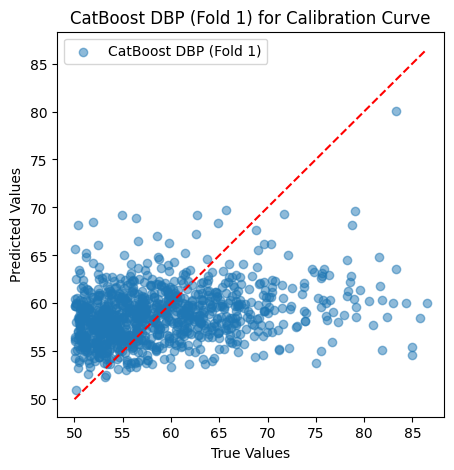

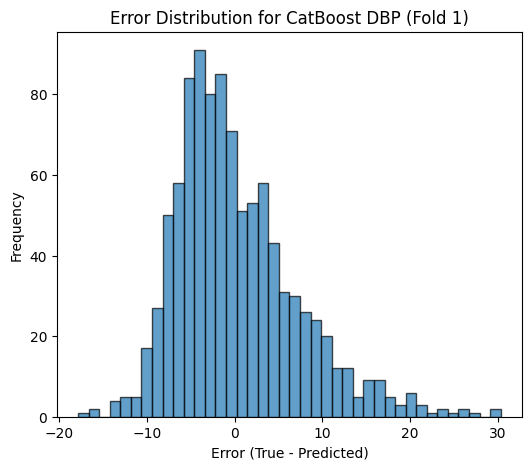

                   Model       R^2        MSE      RMSE       MAE
0  CatBoost DBP (Fold 2)  0.064884  53.649108  7.324555  5.635122
                   Model       R^2        MSE      RMSE      MAE
0  CatBoost DBP (Fold 3)  0.049447  49.859488  7.061125  5.54531
                   Model       R^2        MSE     RMSE       MAE
0  CatBoost DBP (Fold 4)  0.076566  53.489476  7.31365  5.465236
                   Model       R^2        MSE     RMSE       MAE
0  CatBoost DBP (Fold 5)  0.095591  49.361443  7.02577  5.505284

CatBoost DBP Mean ± Std over 5 folds:
R^2: 0.0678 ± 0.0169
MSE: 51.0599 ± 2.0701
RMSE: 7.1442 ± 0.1444
MAE: 5.5060 ± 0.0848

CatBoost DBP BHS Evaluation (Mean over 5 folds):
Grade: B
Percent within 5 mmHg: 5.403e+01%
Percent within 10 mmHg: 8.726e+01%
Percent within 15 mmHg: 9.549e+01%

CatBoost DBP AAMI Evaluation (Mean over 5 folds):
Mean Error (mmHg): -2.849e-02
Standard Deviation (mmHg): 7.14
Pass/Fail: Pass


In [17]:
from catboost import CatBoostRegressor

if MODELS_TO_TEST["CatBoostRegressor"]:
    # DBP
    cross_val_regression(CatBoostRegressor, X.values, dbp.values, label="CatBoost DBP", model_kwargs={'random_state':42, 'verbose':0})

                   Model       R^2         MSE       RMSE        MAE
0  CatBoost SBP (Fold 1)  0.194138  292.577197  17.104888  13.560169


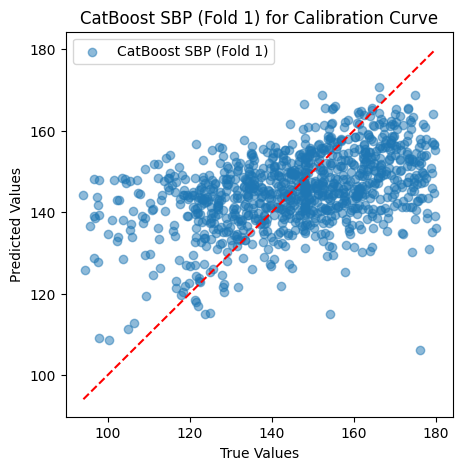

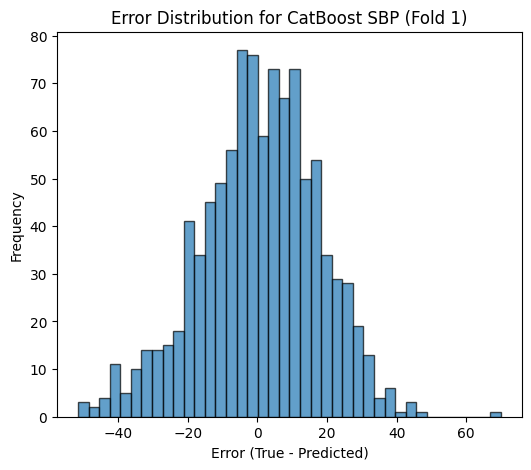

                   Model       R^2         MSE       RMSE        MAE
0  CatBoost SBP (Fold 2)  0.233355  273.669996  16.542974  13.040897
                   Model       R^2         MSE       RMSE        MAE
0  CatBoost SBP (Fold 3)  0.242142  287.401722  16.952927  13.416282
                   Model       R^2         MSE       RMSE        MAE
0  CatBoost SBP (Fold 4)  0.227318  277.543975  16.659651  13.125631
                   Model       R^2         MSE       RMSE        MAE
0  CatBoost SBP (Fold 5)  0.197717  292.264266  17.095738  13.506162

CatBoost SBP Mean ± Std over 5 folds:
R^2: 0.2189 ± 0.0194
MSE: 284.6914 ± 7.7387
RMSE: 16.8712 ± 0.2299
MAE: 13.3298 ± 0.2082

CatBoost SBP BHS Evaluation (Mean over 5 folds):
Grade: D
Percent within 5 mmHg: 2.477e+01%
Percent within 10 mmHg: 4.590e+01%
Percent within 15 mmHg: 6.348e+01%

CatBoost SBP AAMI Evaluation (Mean over 5 folds):
Mean Error (mmHg): 1.080e-02
Standard Deviation (mmHg): 16.87
Pass/Fail: Fail


In [18]:
if MODELS_TO_TEST["CatBoostRegressor"]:
    # SBP
    cross_val_regression(CatBoostRegressor, X.values, sbp.values, label="CatBoost SBP", model_kwargs={'random_state':42, 'verbose':0})

## Multilayer Perceptron Regressor

In [19]:
MLP_HIDDEN_LAYER_SIZES = (64, 64, 32, 16)
MLP_MAX_ITER = 400

              Model       R^2        MSE      RMSE       MAE
0  MLP DBP (Fold 1) -0.076098  55.590698  7.455917  5.676542


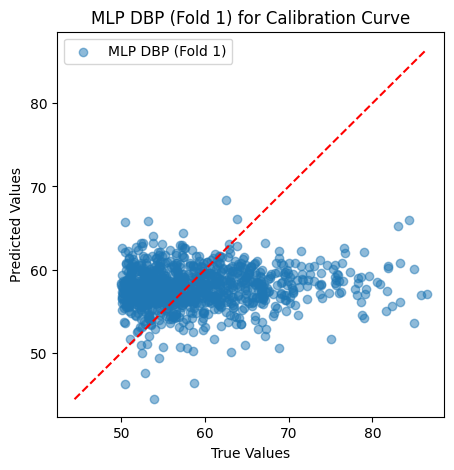

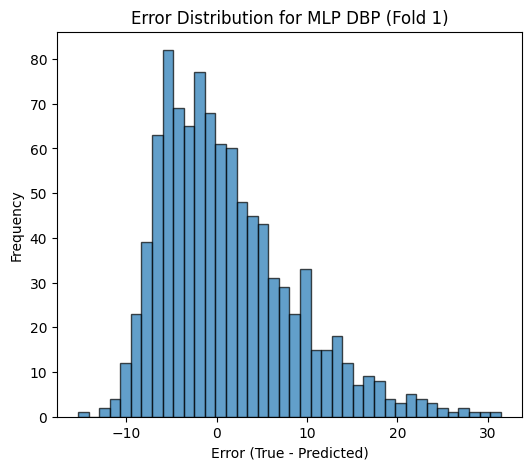

              Model       R^2        MSE      RMSE       MAE
0  MLP DBP (Fold 2) -0.229753  70.552933  8.399579  6.332637
              Model       R^2        MSE      RMSE       MAE
0  MLP DBP (Fold 3) -0.082258  56.767838  7.534443  5.821241
              Model       R^2        MSE      RMSE       MAE
0  MLP DBP (Fold 4) -0.136163  65.811752  8.112444  6.384875
              Model       R^2        MSE      RMSE       MAE
0  MLP DBP (Fold 5) -0.116537  60.939056  7.806347  6.007356

MLP DBP Mean ± Std over 5 folds:
R^2: -0.1282 ± 0.0554
MSE: 61.9325 ± 5.6078
RMSE: 7.8617 ± 0.3541
MAE: 6.0445 ± 0.2777

MLP DBP BHS Evaluation (Mean over 5 folds):
Grade: C
Percent within 5 mmHg: 4.991e+01%
Percent within 10 mmHg: 8.423e+01%
Percent within 15 mmHg: 9.434e+01%

MLP DBP AAMI Evaluation (Mean over 5 folds):
Mean Error (mmHg): 2.380e-01
Standard Deviation (mmHg): 7.81
Pass/Fail: Fail


In [20]:
from sklearn.neural_network import MLPRegressor

if MODELS_TO_TEST["MultilayerPerceptronRegressor"]:
    # DBP
    cross_val_regression(MLPRegressor, X.values, dbp.values, label="MLP DBP", model_kwargs={'hidden_layer_sizes':MLP_HIDDEN_LAYER_SIZES, 'max_iter':MLP_MAX_ITER, 'random_state':42})

              Model      R^2         MSE       RMSE        MAE
0  MLP SBP (Fold 1) -0.09695  398.259644  19.956444  16.328856


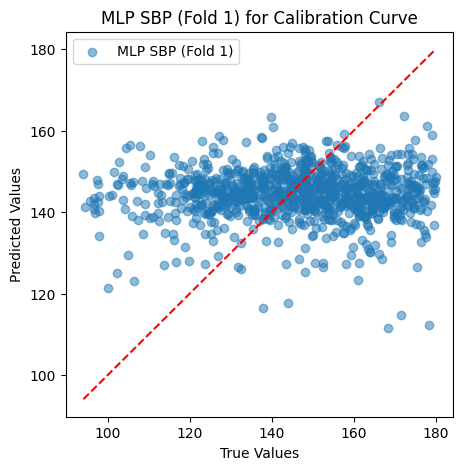

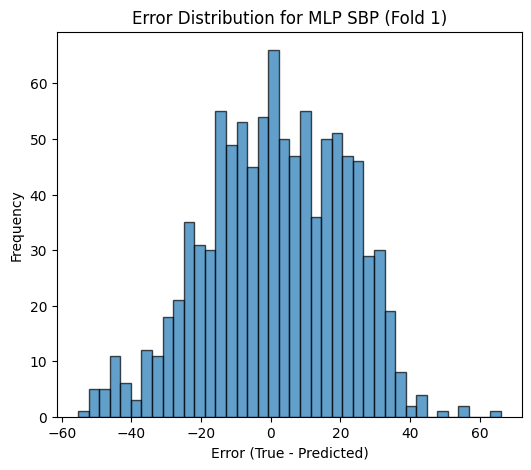

              Model       R^2         MSE       RMSE        MAE
0  MLP SBP (Fold 2) -0.173843  419.028107  20.470177  16.757347
              Model     R^2         MSE      RMSE        MAE
0  MLP SBP (Fold 3) -0.0133  384.272888  19.60288  15.788121
              Model       R^2         MSE       RMSE        MAE
0  MLP SBP (Fold 4) -0.047172  376.139709  19.394321  15.762898
              Model       R^2         MSE       RMSE        MAE
0  MLP SBP (Fold 5) -0.063676  387.487305  19.684698  15.927081

MLP SBP Mean ± Std over 5 folds:
R^2: -0.0790 ± 0.0546
MSE: 393.0375 ± 14.8050
RMSE: 19.8217 ± 0.3709
MAE: 16.1129 ± 0.3806

MLP SBP BHS Evaluation (Mean over 5 folds):
Grade: D
Percent within 5 mmHg: 1.856e+01%
Percent within 10 mmHg: 3.622e+01%
Percent within 15 mmHg: 5.244e+01%

MLP SBP AAMI Evaluation (Mean over 5 folds):
Mean Error (mmHg): 6.662e-01
Standard Deviation (mmHg): 19.65
Pass/Fail: Fail


In [21]:
if MODELS_TO_TEST["MultilayerPerceptronRegressor"]:
    # SBP
    cross_val_regression(MLPRegressor, X.values, sbp.values, label="MLP SBP", model_kwargs={'hidden_layer_sizes':MLP_HIDDEN_LAYER_SIZES, 'max_iter':MLP_MAX_ITER, 'random_state':42})

### Multilayer Perceptron w/ Scaled X and Y

In [22]:
if MODELS_TO_TEST["MultilayerPerceptronScaledRegressor"]:
    # DBP
    cross_val_regression(
        MLPRegressor, X_scaled, dbp.values, label="MLP DBP (Scaled X & Y)",
        model_kwargs={'hidden_layer_sizes':MLP_HIDDEN_LAYER_SIZES, 'max_iter':MLP_MAX_ITER, 'random_state':42},
        scale_X=False, scale_y=True, y_scaler=dbp_scaler
    )

In [23]:
if MODELS_TO_TEST["MultilayerPerceptronScaledRegressor"]:
    # SBP
    cross_val_regression(
        MLPRegressor, X_scaled, sbp.values, label="MLP SBP (Scaled X & Y)",
        model_kwargs={'hidden_layer_sizes':MLP_HIDDEN_LAYER_SIZES, 'max_iter':MLP_MAX_ITER, 'random_state':42},
        scale_X=False, scale_y=True, y_scaler=sbp_scaler
    )

# Causal Analysis

## Direct LINGAM

c:\Users\aniru\AppData\Local\Programs\Python\Python310\lib\site-packages\lingam\direct_lingam.py:224: RuntimeWarning: invalid value encountered in divide
  xj_std = (X[:, j] - np.mean(X[:, j])) / np.std(X[:, j])
c:\Users\aniru\AppData\Local\Programs\Python\Python310\lib\site-packages\lingam\direct_lingam.py:223: RuntimeWarning: invalid value encountered in divide
  xi_std = (X[:, i] - np.mean(X[:, i])) / np.std(X[:, i])
c:\Users\aniru\AppData\Local\Programs\Python\Python310\lib\site-packages\lingam\direct_lingam.py:151: RuntimeWarning: invalid value encountered in scalar divide
  return xi - (np.cov(xi, xj, bias=True)[0, 1] / np.var(xj)) * xj
c:\Users\aniru\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_least_angle.py:2299: RuntimeWarning: divide by zero encountered in log
  n_samples * np.log(2 * np.pi * self.noise_variance_)
c:\Users\aniru\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_least_angle.py:2300: RuntimeWarni

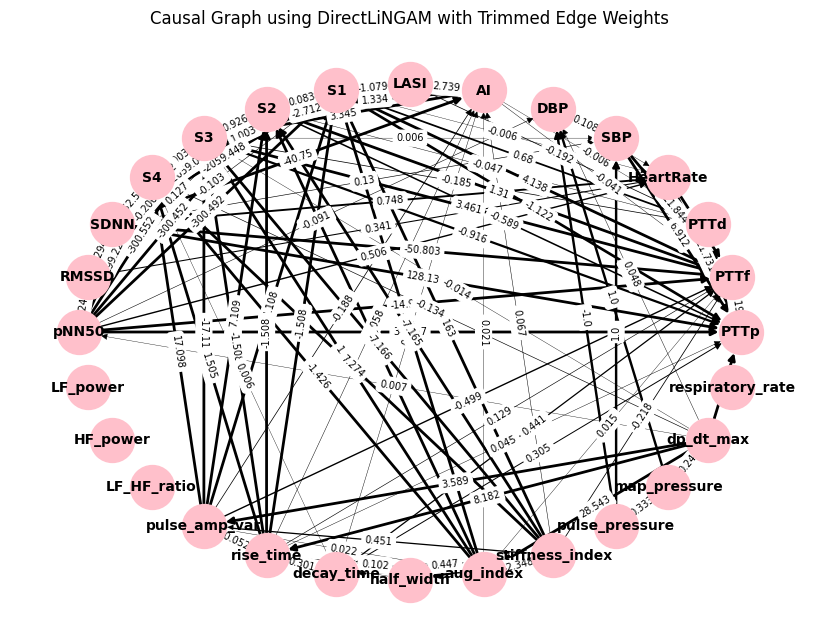

In [24]:
from lingam import DirectLiNGAM
import networkx as nx
from networkx.drawing.nx_pydot import graphviz_layout

EDGE_THRESHOLD = 0.005

# Fit the DirectLiNGAM model
model = DirectLiNGAM()
model.fit(dataset_df)

# Get the adjacency matrix
adjacency_matrix = model.adjacency_matrix_

# Create a directed graph using NetworkX
causal_graph = nx.DiGraph(adjacency_matrix)

# Relabel nodes with feature names
causal_graph = nx.relabel_nodes(causal_graph, {i: col for i, col in enumerate(dataset_df.columns)})

# Remove edges with weights less than 0.005
edges_to_remove = [(u, v) for u, v, d in causal_graph.edges(data=True) if abs(d['weight']) < EDGE_THRESHOLD]
causal_graph.remove_edges_from(edges_to_remove)

# Draw the graph
plt.figure(figsize=(8, 6))
pos = nx.circular_layout(causal_graph)
edge_weights = [min(abs(weight) * 1.5 + 0.25, 2) for weight in nx.get_edge_attributes(causal_graph, 'weight').values()]
nx.draw(
    causal_graph, pos, with_labels=True, node_size=1000, node_color="pink",
    font_size=10, font_weight="bold", edge_color="black", width=edge_weights
)

# Add edge weights as labels
edge_labels = {edge: round(weight, 3) for edge, weight in nx.get_edge_attributes(causal_graph, 'weight').items()}
nx.draw_networkx_edge_labels(causal_graph, pos, edge_labels=edge_labels, font_size=7, )

plt.title("Causal Graph using DirectLiNGAM with Trimmed Edge Weights")
plt.savefig('figures/causal_graph_direct_lingam.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

## CATE Estimation

In [25]:
from econml.dml import CausalForestDML

# Initialize the CausalForestDML model
causal_forest_sbp = CausalForestDML(
    model_t=RandomForestRegressor(n_estimators=100, random_state=42),
    model_y=RandomForestRegressor(n_estimators=100, random_state=42),
    discrete_treatment=False,
    random_state=42
)

# Fit the model
causal_forest_sbp.fit(Y=sbp.values, T=X.values, X=X.values, W=None)

# Estimate treatment effects
treatment_effects_sbp = causal_forest_sbp.const_marginal_effect(X=X.values)

       PTTp      PTTf      PTTd  HeartRate        AI      LASI          S1  \
0  9.609528 -0.528222  0.215015   0.052408 -2.935711 -1.996193 -257.676798   

           S2          S3          S4  ...      LF_power      HF_power  \
0 -256.388854 -257.555782  256.498985  ... -4.812220e-12  8.824511e-13   

    LF_HF_ratio  pulse_amp_var  rise_time  decay_time  half_width  aug_index  \
0  8.774865e-13      -5.070837 -23.524487   -6.192646   88.061428  59.810957   

   stiffness_index  respiratory_rate  
0         2.862006         -0.008466  

[1 rows x 23 columns]


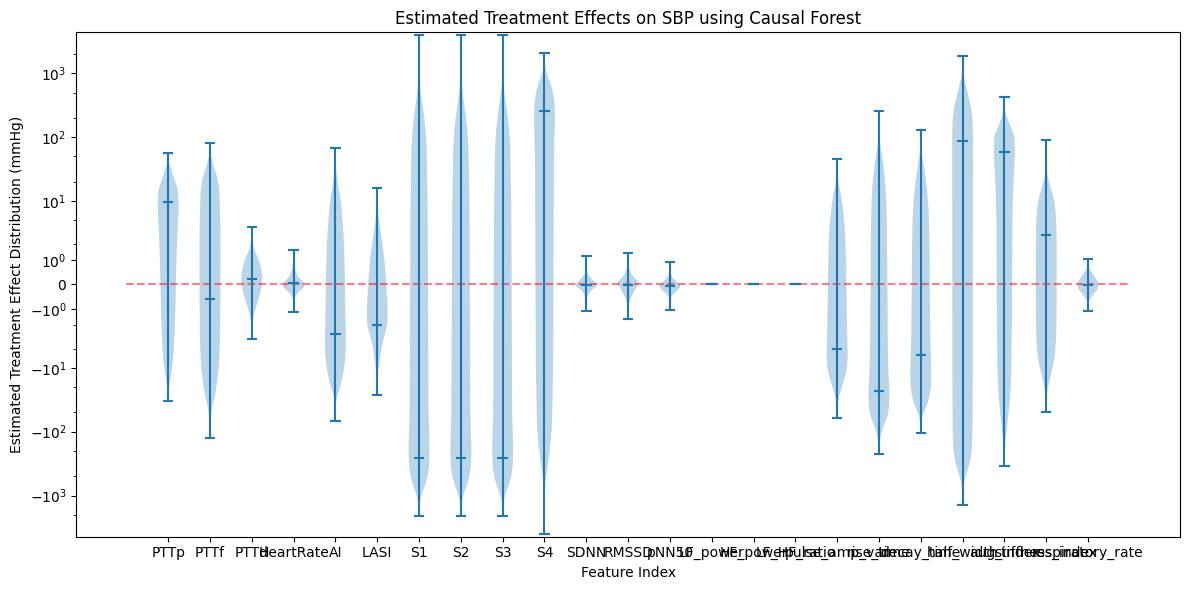

In [26]:
treatment_effects_sbp_df = pd.DataFrame({
    feature: np.mean(treatment_effects_sbp[:, i]) for i, feature in enumerate(X.columns)    
}, index=[0])

print(treatment_effects_sbp_df)

# Plotting the treatment effects as violin plots
plt.figure(figsize=(12, 6))
plt.hlines(y=0, xmin=0, xmax=len(X.columns) + 1, color='red', linestyle='--', label='Zero Effect', alpha=0.5)
plt.violinplot([treatment_effects_sbp[:, i] for i in range(treatment_effects_sbp.shape[1])], showmeans=True)
plt.xticks(ticks=range(1, len(X.columns) + 1), labels=X.columns, ha='center')
plt.xlabel('Feature Index')
plt.ylabel('Estimated Treatment Effect Distribution (mmHg)')
plt.yscale('asinh')
plt.title('Estimated Treatment Effects on SBP using Causal Forest')
plt.tight_layout()
plt.show()
plt.close()

In [27]:
# Initialize the CausalForestDML model
causal_forest_dbp = CausalForestDML(
    model_t=RandomForestRegressor(n_estimators=100, random_state=42),
    model_y=RandomForestRegressor(n_estimators=100, random_state=42),
    discrete_treatment=False,
    random_state=42
)

# Fit the model
causal_forest_dbp.fit(Y=dbp.values, T=X.values, X=X.values, W=None)

# Estimate treatment effects
treatment_effects_dbp = causal_forest_dbp.const_marginal_effect(X=X.values)

       PTTp      PTTf      PTTd  HeartRate        AI      LASI         S1  \
0  0.914687  1.112052 -0.013166     0.0214 -0.645927  0.662688 -33.587987   

          S2         S3         S4  ...      LF_power      HF_power  \
0 -33.998039 -33.605184  33.755067  ... -3.234882e-12  1.886055e-12   

    LF_HF_ratio  pulse_amp_var  rise_time  decay_time  half_width  aug_index  \
0  6.179460e-13      -0.863238  -3.689052   -3.134154  -37.878737  13.194167   

   stiffness_index  respiratory_rate  
0         -0.78798          0.004034  

[1 rows x 23 columns]


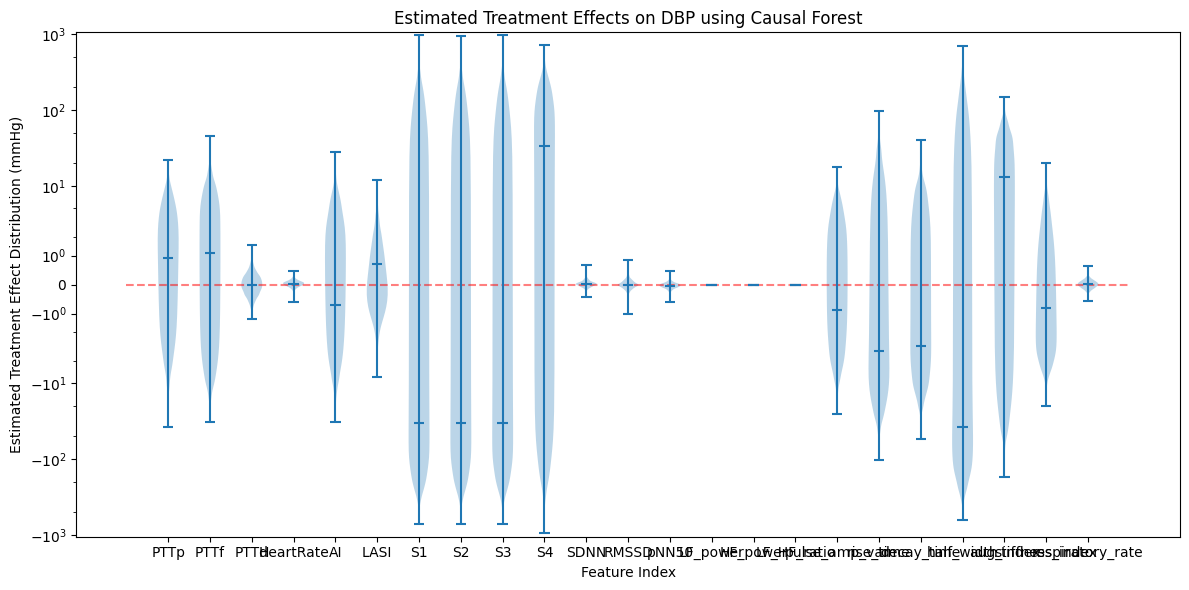

In [28]:
treatment_effects_dbp_df = pd.DataFrame({
    feature: np.mean(treatment_effects_dbp[:, i]) for i, feature in enumerate(X.columns)    
}, index=[0])

print(treatment_effects_dbp_df)

# Plotting the treatment effects as violin plots
plt.figure(figsize=(12, 6))
plt.hlines(y=0, xmin=0, xmax=len(X.columns) + 1, color='red', linestyle='--', label='Zero Effect', alpha=0.5)
plt.violinplot([treatment_effects_dbp[:, i] for i in range(treatment_effects_dbp.shape[1])], showmeans=True)
plt.xticks(ticks=range(1, len(X.columns) + 1), labels=X.columns, ha='center')
plt.xlabel('Feature Index')
plt.ylabel('Estimated Treatment Effect Distribution (mmHg)')
plt.yscale('asinh')
plt.title('Estimated Treatment Effects on DBP using Causal Forest')
plt.tight_layout()
plt.show()
plt.close()

## Causally "Regularized" Models

In [29]:
import torch
from sklearn.base import BaseEstimator, RegressorMixin

import torch.nn as nn
import torch.optim as optim

class CausallyRegularizedNN(BaseEstimator, RegressorMixin):
    def __init__(self, input_dim, hidden_layer_sizes=(64, 64, 32, 16), learning_rate=0.001, 
                 max_iter=500, causal_regularization_weight=1, random_state=42):
        self.input_dim = input_dim
        self.hidden_layer_sizes = hidden_layer_sizes
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.causal_regularization_weight = causal_regularization_weight
        self.random_state = random_state
        
    def _build_network(self):
        layers = []
        prev_size = self.input_dim
        
        for hidden_size in self.hidden_layer_sizes:
            layers.append(nn.Linear(prev_size, hidden_size))
            layers.append(nn.ReLU())
            prev_size = hidden_size
        
        layers.append(nn.Linear(prev_size, 1))
        
        return nn.Sequential(*layers)
    
    def fit(self, X, y):
        torch.manual_seed(self.random_state)
        
        self.model = self._build_network()
        self.optimizer = optim.Adam(self.model.parameters(), lr=self.learning_rate)
        self.criterion = nn.MSELoss()
        
        X_tensor = torch.FloatTensor(X)
        y_tensor = torch.FloatTensor(y).reshape(-1, 1)
        
        # Early stopping variables
        best_loss = float('inf')
        patience = 10
        patience_counter = 0
        
        for epoch in range(self.max_iter):
            self.optimizer.zero_grad()
            
            # Forward pass
            outputs = self.model(X_tensor)
            
            # Standard MSE loss
            mse_loss = self.criterion(outputs, y_tensor)
            
            # Causal regularization: penalize large weights in early layers
            causal_penalty = 0
            for i, layer in enumerate(self.model):
                if isinstance(layer, nn.Linear):
                    # Higher penalty for earlier layers (closer to input)
                    layer_weight = (len(self.hidden_layer_sizes) - i) / len(self.hidden_layer_sizes)
                    causal_penalty += layer_weight * torch.norm(layer.weight, p=1)
            
            # Total loss
            total_loss = mse_loss + self.causal_regularization_weight * abs(causal_penalty)
            print(f'Epoch {epoch+1}/{self.max_iter}, Loss: {total_loss.item():.4f} (MSE: {mse_loss.item():.4f}, Causal Penalty: {abs(causal_penalty.item()):.4f})')
            
            # Early stopping check
            if total_loss.item() < best_loss:
                best_loss = total_loss.item()
                patience_counter = 0
            else:
                patience_counter += 1
                if patience_counter >= patience:
                    print(f'Early stopping at epoch {epoch+1}')
                    break
            
            total_loss.backward()
            self.optimizer.step()
            
        return self
    def predict(self, X):
        self.model.eval()
        with torch.no_grad():
            X_tensor = torch.FloatTensor(X)
            predictions = self.model(X_tensor)
        return predictions.numpy().flatten()

def train_and_evaluate_causal_model(model_cls, X_train, X_test, y_train, y_test, model_kwargs=None, scale_y=False, y_scaler=None):
    # Add input dimension to model kwargs
    if model_kwargs is None:
        model_kwargs = {}
    model_kwargs['input_dim'] = X_train.shape[1]
    
    model = model_cls(**model_kwargs)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    if scale_y and y_scaler is not None:
        # Inverse transform predictions for reporting
        y_pred = y_scaler.inverse_transform(y_pred.reshape(-1, 1)).flatten()
        y_test = y_scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()
    
    return y_test, y_pred

Epoch 1/400, Loss: 258.2955 (MSE: 1.0246, Causal Penalty: 257.2709)
Epoch 2/400, Loss: 254.5302 (MSE: 1.0225, Causal Penalty: 253.5077)
Epoch 3/400, Loss: 250.7850 (MSE: 1.0205, Causal Penalty: 249.7645)
Epoch 4/400, Loss: 247.0634 (MSE: 1.0186, Causal Penalty: 246.0448)
Epoch 5/400, Loss: 243.3772 (MSE: 1.0169, Causal Penalty: 242.3604)
Epoch 6/400, Loss: 239.7144 (MSE: 1.0152, Causal Penalty: 238.6992)
Epoch 7/400, Loss: 236.0649 (MSE: 1.0137, Causal Penalty: 235.0513)
Epoch 8/400, Loss: 232.4415 (MSE: 1.0122, Causal Penalty: 231.4293)
Epoch 9/400, Loss: 228.8439 (MSE: 1.0109, Causal Penalty: 227.8329)
Epoch 10/400, Loss: 225.2634 (MSE: 1.0097, Causal Penalty: 224.2538)
Epoch 11/400, Loss: 221.7044 (MSE: 1.0086, Causal Penalty: 220.6958)
Epoch 12/400, Loss: 218.1697 (MSE: 1.0076, Causal Penalty: 217.1621)
Epoch 13/400, Loss: 214.6455 (MSE: 1.0067, Causal Penalty: 213.6388)
Epoch 14/400, Loss: 211.1450 (MSE: 1.0059, Causal Penalty: 210.1391)
Epoch 15/400, Loss: 207.6721 (MSE: 1.0052, 

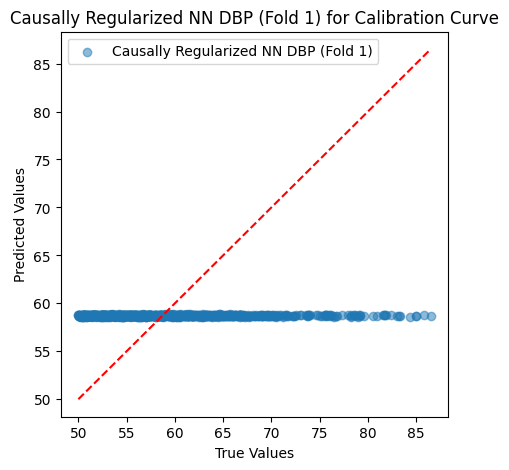

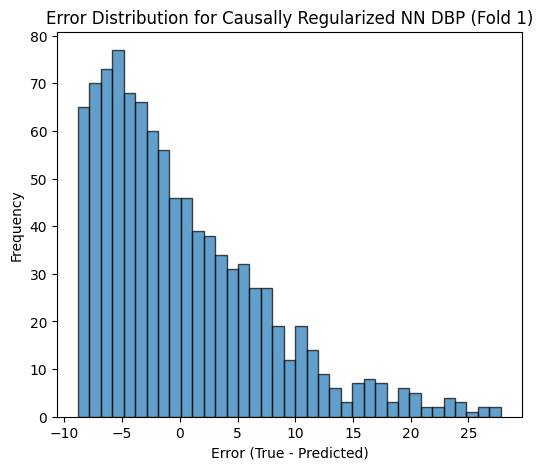

Epoch 1/400, Loss: 258.2956 (MSE: 1.0247, Causal Penalty: 257.2709)
Epoch 2/400, Loss: 254.5303 (MSE: 1.0227, Causal Penalty: 253.5077)
Epoch 3/400, Loss: 250.7852 (MSE: 1.0207, Causal Penalty: 249.7645)
Epoch 4/400, Loss: 247.0636 (MSE: 1.0188, Causal Penalty: 246.0448)
Epoch 5/400, Loss: 243.3774 (MSE: 1.0171, Causal Penalty: 242.3604)
Epoch 6/400, Loss: 239.7146 (MSE: 1.0154, Causal Penalty: 238.6992)
Epoch 7/400, Loss: 236.0651 (MSE: 1.0139, Causal Penalty: 235.0513)
Epoch 8/400, Loss: 232.4417 (MSE: 1.0124, Causal Penalty: 231.4292)
Epoch 9/400, Loss: 228.8440 (MSE: 1.0111, Causal Penalty: 227.8329)
Epoch 10/400, Loss: 225.2636 (MSE: 1.0098, Causal Penalty: 224.2537)
Epoch 11/400, Loss: 221.7045 (MSE: 1.0087, Causal Penalty: 220.6958)
Epoch 12/400, Loss: 218.1699 (MSE: 1.0077, Causal Penalty: 217.1621)
Epoch 13/400, Loss: 214.6456 (MSE: 1.0068, Causal Penalty: 213.6388)
Epoch 14/400, Loss: 211.1452 (MSE: 1.0060, Causal Penalty: 210.1392)
Epoch 15/400, Loss: 207.6725 (MSE: 1.0053, 

In [30]:
# DBP with Causally Regularized Neural Network
cross_val_regression(
    CausallyRegularizedNN, X_scaled, dbp.values, 
    label="Causally Regularized NN DBP",
    model_kwargs={
        'input_dim': X_scaled.shape[1],
        'hidden_layer_sizes': MLP_HIDDEN_LAYER_SIZES,
        'max_iter': MLP_MAX_ITER,
        'causal_regularization_weight': 1,
        'random_state': 42
    },
    scale_X=False, scale_y=True, y_scaler=dbp_scaler
)

Epoch 1/400, Loss: 258.2961 (MSE: 1.0253, Causal Penalty: 257.2709)
Epoch 2/400, Loss: 254.5308 (MSE: 1.0232, Causal Penalty: 253.5077)
Epoch 3/400, Loss: 250.7857 (MSE: 1.0212, Causal Penalty: 249.7645)
Epoch 4/400, Loss: 247.0641 (MSE: 1.0193, Causal Penalty: 246.0447)
Epoch 5/400, Loss: 243.3779 (MSE: 1.0175, Causal Penalty: 242.3604)
Epoch 6/400, Loss: 239.7150 (MSE: 1.0158, Causal Penalty: 238.6992)
Epoch 7/400, Loss: 236.0654 (MSE: 1.0142, Causal Penalty: 235.0512)
Epoch 8/400, Loss: 232.4420 (MSE: 1.0127, Causal Penalty: 231.4293)
Epoch 9/400, Loss: 228.8444 (MSE: 1.0113, Causal Penalty: 227.8331)
Epoch 10/400, Loss: 225.2638 (MSE: 1.0100, Causal Penalty: 224.2538)
Epoch 11/400, Loss: 221.7048 (MSE: 1.0089, Causal Penalty: 220.6960)
Epoch 12/400, Loss: 218.1701 (MSE: 1.0078, Causal Penalty: 217.1623)
Epoch 13/400, Loss: 214.6457 (MSE: 1.0068, Causal Penalty: 213.6389)
Epoch 14/400, Loss: 211.1449 (MSE: 1.0059, Causal Penalty: 210.1391)
Epoch 15/400, Loss: 207.6718 (MSE: 1.0051, 

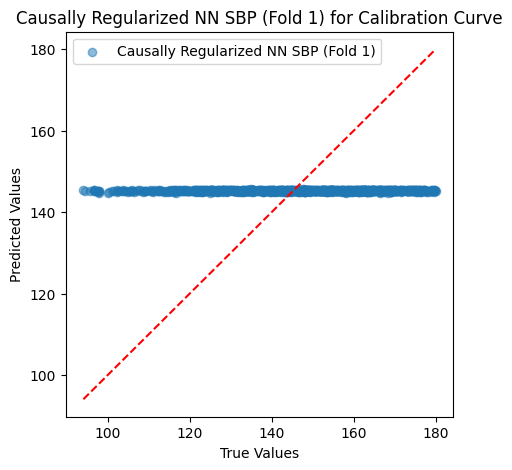

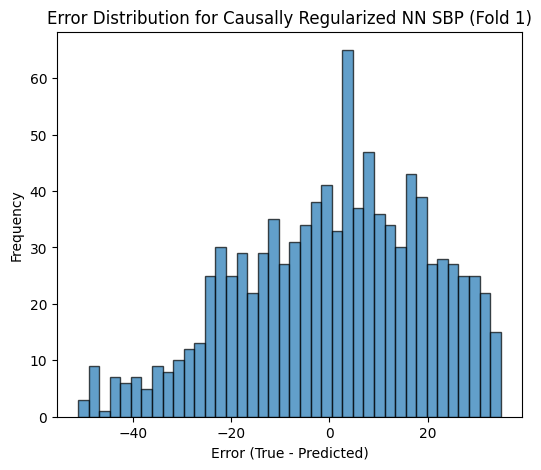

Epoch 1/400, Loss: 258.2962 (MSE: 1.0253, Causal Penalty: 257.2709)
Epoch 2/400, Loss: 254.5309 (MSE: 1.0232, Causal Penalty: 253.5077)
Epoch 3/400, Loss: 250.7858 (MSE: 1.0213, Causal Penalty: 249.7645)
Epoch 4/400, Loss: 247.0642 (MSE: 1.0194, Causal Penalty: 246.0447)
Epoch 5/400, Loss: 243.3780 (MSE: 1.0176, Causal Penalty: 242.3604)
Epoch 6/400, Loss: 239.7151 (MSE: 1.0160, Causal Penalty: 238.6992)
Epoch 7/400, Loss: 236.0656 (MSE: 1.0144, Causal Penalty: 235.0512)
Epoch 8/400, Loss: 232.4422 (MSE: 1.0129, Causal Penalty: 231.4293)
Epoch 9/400, Loss: 228.8445 (MSE: 1.0115, Causal Penalty: 227.8330)
Epoch 10/400, Loss: 225.2640 (MSE: 1.0102, Causal Penalty: 224.2538)
Epoch 11/400, Loss: 221.7048 (MSE: 1.0090, Causal Penalty: 220.6958)
Epoch 12/400, Loss: 218.1701 (MSE: 1.0079, Causal Penalty: 217.1621)
Epoch 13/400, Loss: 214.6458 (MSE: 1.0070, Causal Penalty: 213.6388)
Epoch 14/400, Loss: 211.1450 (MSE: 1.0061, Causal Penalty: 210.1390)
Epoch 15/400, Loss: 207.6720 (MSE: 1.0053, 

In [31]:
# SBP with Causally Regularized Neural Network
cross_val_regression(
    CausallyRegularizedNN, X_scaled, sbp.values, 
    label="Causally Regularized NN SBP",
    model_kwargs={
        'input_dim': X_scaled.shape[1],
        'hidden_layer_sizes': MLP_HIDDEN_LAYER_SIZES,
        'max_iter': MLP_MAX_ITER,
        'causal_regularization_weight': 1,
        'random_state': 42
    },
    scale_X=False, scale_y=True, y_scaler=sbp_scaler
)

## Causal Feature Ablation Test

In [32]:
import seaborn as sns

def get_significant_features(treatment_effects_df, threshold):
    return [col for col in treatment_effects_df.columns if abs(treatment_effects_df[col].iloc[0]) >= threshold]

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_rel, wilcoxon

def run_ablation_test(treatment_effects_df, target_values, target_name, thresholds=[0.1, 1.0, 10.0]):
    results = []
    mae_storage = {}  # store MAE per (model, threshold)

    for threshold in thresholds:
        significant_features = get_significant_features(treatment_effects_df, threshold)
        if not significant_features:
            print(f"\nThreshold {threshold}: No significant features found")
            continue
        X_subset = X[significant_features].values

        for model_name, model_cls, model_kwargs in [
            ("XGBoost", XGBRegressor, {'random_state':42}),
            ("SVM", SVR, {'kernel':'rbf'}),
            ("CatBoost", CatBoostRegressor, {'random_state':42, 'verbose':0})
        ]:
            print(f"\n--- {model_name} {target_name} (Threshold {threshold}) ---")
            mae_values = []

            def eval_regression_patch(y_true, y_pred, label="Model", plot=True):
                from sklearn.metrics import mean_absolute_error
                mae = mean_absolute_error(y_true, y_pred)
                return 0, 0, 0, mae

            import types
            global evaluate_regression
            orig_evaluate_regression = evaluate_regression
            evaluate_regression = eval_regression_patch

            global print_cross_val_results
            orig_print_cross_val_results = print_cross_val_results
            def dummy_print_cross_val_results(label, metrics, bhs_results, aami_results):
                pass
            print_cross_val_results = dummy_print_cross_val_results

            for fold, (train_idx, test_idx) in enumerate(kf.split(X_subset)):
                X_train = X_subset[train_idx]
                X_test = X_subset[test_idx]
                y_train = target_values[train_idx]
                y_test = target_values[test_idx]
                model = model_cls(**model_kwargs)
                model.fit(X_train, y_train)
                y_pred = model.predict(X_test)
                _, _, _, mae = eval_regression_patch(y_test, y_pred)
                mae_values.append(mae)

            evaluate_regression = orig_evaluate_regression
            print_cross_val_results = orig_print_cross_val_results

            mae_storage[(model_name, threshold)] = mae_values
            for mae in mae_values:
                results.append({
                    'Model': model_name,
                    'Threshold': threshold,
                    'MAE': mae
                })

    results_df = pd.DataFrame(results)
    print("\n=== Ablation Test Results ===")
    print(results_df.groupby(['Model', 'Threshold'])['MAE'].mean())

    plt.figure(figsize=(10,6))
    sns.barplot(data=results_df, x='Model', y='MAE', hue='Threshold')
    plt.title(f"Mean MAE per Model per Threshold ({target_name})")
    plt.show()

    for model_name in results_df['Model'].unique():
        plt.figure(figsize=(8,5))
        sns.boxplot(data=results_df[results_df['Model'] == model_name], x='Threshold', y='MAE')
        plt.title(f"{model_name} - Box Plot of MAE Across Thresholds")
        plt.show()

    # Statistical testing
    print("\n=== Statistical Significance Testing (Paired t-tests & Wilcoxon) ===")
    thresholds_sorted = sorted(set(thresholds))
    for model_name in results_df['Model'].unique():
        print(f"\n>> {model_name}")
        for i in range(len(thresholds_sorted)):
            for j in range(i + 1, len(thresholds_sorted)):
                t1 = thresholds_sorted[i]
                t2 = thresholds_sorted[j]
                key1 = (model_name, t1)
                key2 = (model_name, t2)
                if key1 not in mae_storage or key2 not in mae_storage:
                    continue
                mae1 = mae_storage[key1]
                mae2 = mae_storage[key2]
                if len(mae1) != len(mae2):
                    print(f"Warning: unequal folds between {t1} and {t2}, skipping test.")
                    continue

                # Paired t-test
                t_stat, p_ttest = ttest_rel(mae1, mae2)
                # Wilcoxon signed-rank test
                try:
                    w_stat, p_wilcoxon = wilcoxon(mae1, mae2)
                except ValueError:
                    p_wilcoxon = np.nan  # Wilcoxon fails if no differences

                print(f"Threshold {t1} vs {t2}:")
                print(f"  t-test p-value: {p_ttest:.4f} {'** significant **' if p_ttest < 0.05 else ''}")
                print(f"  Wilcoxon p-value: {p_wilcoxon:.4f} {'** significant **' if p_wilcoxon < 0.05 else ''}")




--- XGBoost SBP (Threshold 0.1) ---

--- SVM SBP (Threshold 0.1) ---

--- CatBoost SBP (Threshold 0.1) ---

--- XGBoost SBP (Threshold 1.0) ---

--- SVM SBP (Threshold 1.0) ---

--- CatBoost SBP (Threshold 1.0) ---

--- XGBoost SBP (Threshold 10.0) ---

--- SVM SBP (Threshold 10.0) ---

--- CatBoost SBP (Threshold 10.0) ---

=== Ablation Test Results ===
Model     Threshold
CatBoost  0.1          13.734668
          1.0          13.917567
          10.0         15.022926
SVM       0.1          15.570817
          1.0          15.570532
          10.0         15.572401
XGBoost   0.1          14.298101
          1.0          14.390724
          10.0         15.599298
Name: MAE, dtype: float64


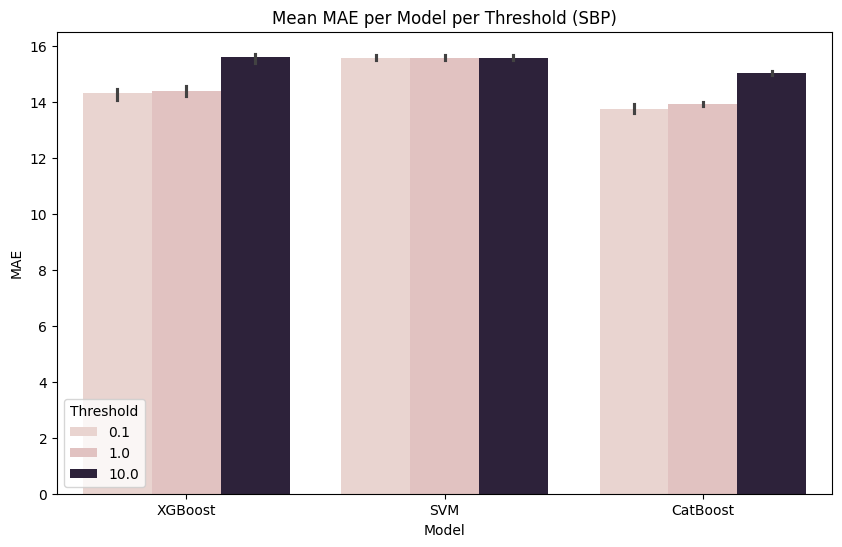

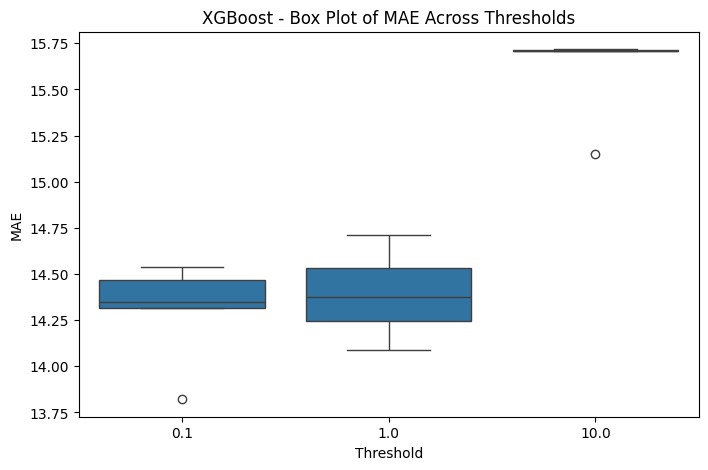

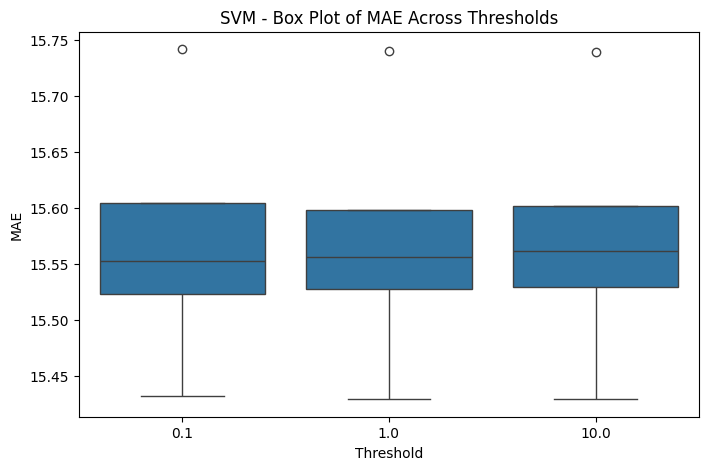

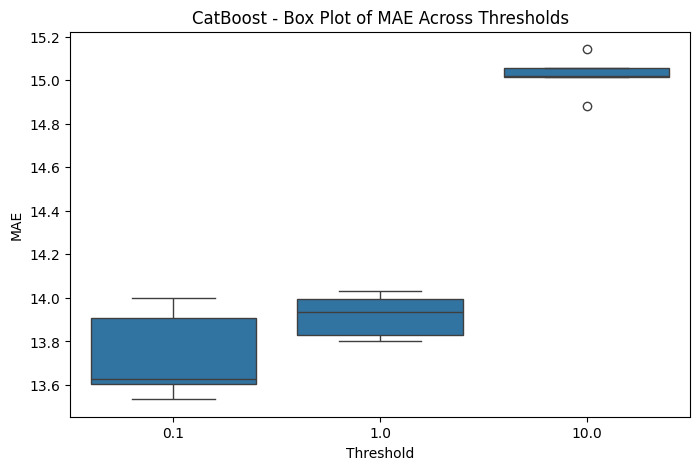


=== Statistical Significance Testing (Paired t-tests & Wilcoxon) ===

>> XGBoost
Threshold 0.1 vs 1.0:
  t-test p-value: 0.4192 
  Wilcoxon p-value: 0.4375 
Threshold 0.1 vs 10.0:
  t-test p-value: 0.0026 ** significant **
  Wilcoxon p-value: 0.0625 
Threshold 1.0 vs 10.0:
  t-test p-value: 0.0007 ** significant **
  Wilcoxon p-value: 0.0625 

>> SVM
Threshold 0.1 vs 1.0:
  t-test p-value: 0.8903 
  Wilcoxon p-value: 1.0000 
Threshold 0.1 vs 10.0:
  t-test p-value: 0.5712 
  Wilcoxon p-value: 0.8125 
Threshold 1.0 vs 10.0:
  t-test p-value: 0.1748 
  Wilcoxon p-value: 0.3125 

>> CatBoost
Threshold 0.1 vs 1.0:
  t-test p-value: 0.0297 ** significant **
  Wilcoxon p-value: 0.0625 
Threshold 0.1 vs 10.0:
  t-test p-value: 0.0002 ** significant **
  Wilcoxon p-value: 0.0625 
Threshold 1.0 vs 10.0:
  t-test p-value: 0.0000 ** significant **
  Wilcoxon p-value: 0.0625 


In [33]:
run_ablation_test(treatment_effects_sbp_df, sbp.values, "SBP")


--- XGBoost DBP (Threshold 0.1) ---

--- SVM DBP (Threshold 0.1) ---

--- CatBoost DBP (Threshold 0.1) ---

--- XGBoost DBP (Threshold 1.0) ---

--- SVM DBP (Threshold 1.0) ---

--- CatBoost DBP (Threshold 1.0) ---

--- XGBoost DBP (Threshold 10.0) ---

--- SVM DBP (Threshold 10.0) ---

--- CatBoost DBP (Threshold 10.0) ---

=== Ablation Test Results ===
Model     Threshold
CatBoost  0.1          5.569986
          1.0          5.637515
          10.0         5.783718
SVM       0.1          5.565588
          1.0          5.568599
          10.0         5.567632
XGBoost   0.1          5.775990
          1.0          5.803884
          10.0         6.040389
Name: MAE, dtype: float64


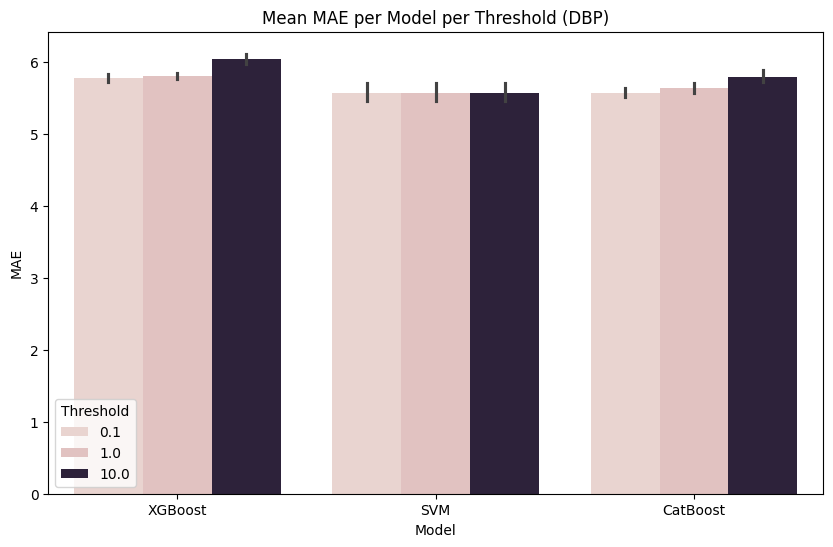

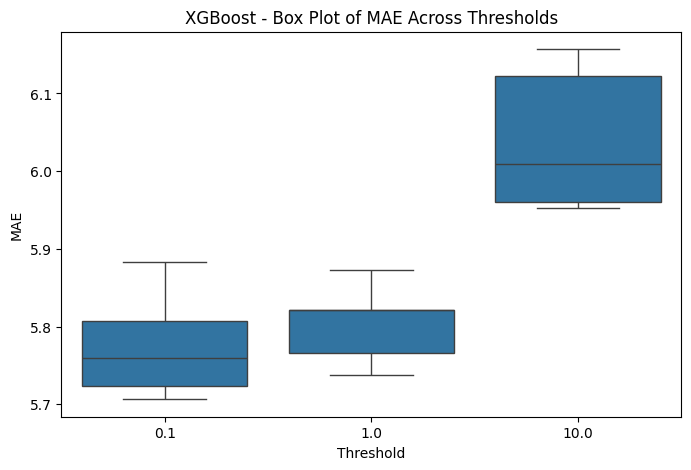

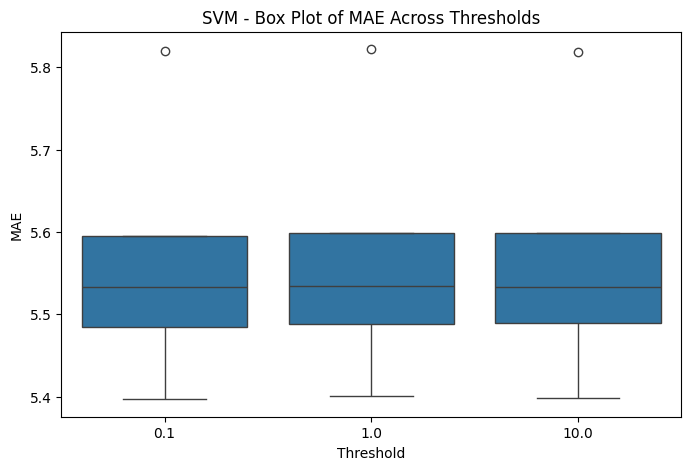

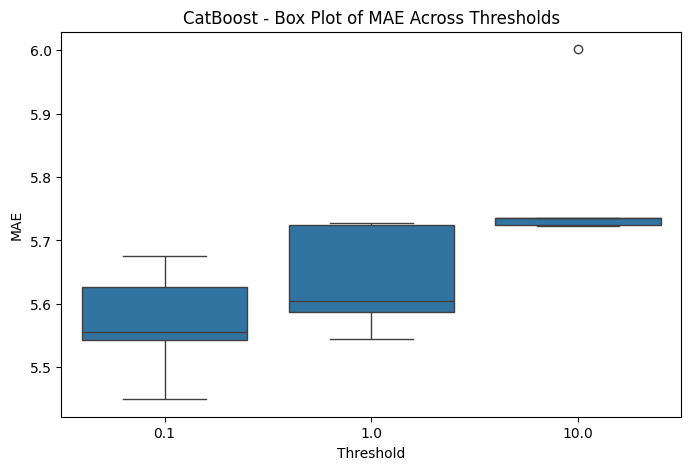


=== Statistical Significance Testing (Paired t-tests & Wilcoxon) ===

>> XGBoost
Threshold 0.1 vs 1.0:
  t-test p-value: 0.3144 
  Wilcoxon p-value: 0.4375 
Threshold 0.1 vs 10.0:
  t-test p-value: 0.0067 ** significant **
  Wilcoxon p-value: 0.0625 
Threshold 1.0 vs 10.0:
  t-test p-value: 0.0143 ** significant **
  Wilcoxon p-value: 0.0625 

>> SVM
Threshold 0.1 vs 1.0:
  t-test p-value: 0.0019 ** significant **
  Wilcoxon p-value: 0.0625 
Threshold 0.1 vs 10.0:
  t-test p-value: 0.1544 
  Wilcoxon p-value: 0.3125 
Threshold 1.0 vs 10.0:
  t-test p-value: 0.3607 
  Wilcoxon p-value: 0.4375 

>> CatBoost
Threshold 0.1 vs 1.0:
  t-test p-value: 0.0057 ** significant **
  Wilcoxon p-value: 0.0625 
Threshold 0.1 vs 10.0:
  t-test p-value: 0.0057 ** significant **
  Wilcoxon p-value: 0.0625 
Threshold 1.0 vs 10.0:
  t-test p-value: 0.0318 ** significant **
  Wilcoxon p-value: 0.1250 


In [34]:
run_ablation_test(treatment_effects_dbp_df, dbp.values, "DBP")